In [82]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations


# needed for editable text in svg format
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['text.usetex'] = False
plt.rcParams['svg.fonttype'] = 'none'

# import homemade functions:
from MAPseq_processing import *
from MAPseq_plotting import *

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
# out_path = '/Volumes/Data/Emily/figures/fig_3_sc/python_out/'
# out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/figure_pics/'
out_path = "/Users/eisko/Documents/CSHL/mapseq_paper/svg_images/"

#### load data - OMC
omc_bin = pd.read_pickle(in_path+"M194_M220_OMC_bin4.pkl")
# omc_countN = pd.read_pickle(in_path+"M194_M220_OMC_countN4.pkl")

#### load data - OMC
aca_bin = pd.read_pickle(in_path+"M194_M220_ACA_bin4.pkl")
# aca_countN = pd.read_pickle(in_path+"M194_M220_ACA_countN4.pkl")


# Preprocessing/sorting

In [3]:
# initial processing - OMC
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]

# seperate it cells
omc_it = [df[df['type']=="IT"] for df in omc_type]

# seperate pt cells
omc_pt = [df[df['type']=="PT"] for df in omc_type]


In [4]:
# initial processing - ACA
# bin processing
aca_clean = [clean_up_data(df, to_drop=["OB", "OMCi", "OMCc", "HIP"], inj_site="ACAi") for df in aca_bin]
aca_type = [sort_by_celltype(df, it_areas=["ACAc", "AUD", "STR"]) for df in aca_clean]

# seperate it cells
aca_it = [df[df['type']=="IT"] for df in aca_type]

# seperate pt cells
aca_pt = [df[df['type']=="PT"] for df in aca_type]


In [15]:
print("MOUSE", "\t", "OMC_IT", "\t", "ACA_IT")
for i in range(metadata.shape[0]):
    print(metadata.loc[i, "mice"], "\t", omc_it[i].shape[0], "\t\t", aca_it[i].shape[0])

MOUSE 	 OMC_IT 	 ACA_IT
MMM1 	 8287 		 5645
MMF2 	 13050 		 13562
MMF3 	 11521 		 31123
STM1 	 535 		 265
STM2 	 443 		 2481
STF3 	 306 		 1985
MMM4 	 5201 		 3647
MMF5 	 15256 		 13150
STF4 	 675 		 639
STM5 	 380 		 1632
STF6 	 776 		 2342
STM7 	 527 		 1174


# Calculate/plot motifs across animals

## OMC

In [86]:
motifs = []
for i in range(1,4):
    motifs.append(list(combinations(["OMCc", "AUD", "STR"], i)))

motifs = [x for item in motifs for x in item]
memberships = from_memberships(motifs)
motif_tf = memberships.index
motif_tf

motifs_strings = []
for r in motif_tf:
    motif = ""
    for i in range(3):
        if r[i]:
            motif = motif+motif_tf.names[i]+"_"
    motifs_strings.append(motif)

In [87]:
it_areas = ["OMCc", "AUD", "STR"]

it_motif_prop = [df_to_motif_proportion(df, areas=it_areas) for df in omc_it]

motif_dfs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame({"motif":motifs, "motif_strings":motifs_strings,
                         "proportion":it_motif_prop[i], "species":metadata.loc[i, "species"], 
                        "mice":metadata.loc[i,"mice"]}).reset_index(drop=True)
    motif_dfs.append(df)
plot_motifs = pd.concat(motif_dfs)
plot_motifs

,motif,motif_strings,proportion,species,mice
0,"(OMCc,)",OMCc_,0.135513,MMus,MMM1
1,"(AUD,)",AUD_,0.000362,MMus,MMM1
2,"(STR,)",STR_,0.321950,MMus,MMM1
3,"(OMCc, AUD)",AUD_OMCc_,0.000965,MMus,MMM1
4,"(OMCc, STR)",OMCc_STR_,0.528418,MMus,MMM1
...,...,...,...,...,...
2,"(STR,)",STR_,0.055028,STeg,STM7
3,"(OMCc, AUD)",AUD_OMCc_,0.017078,STeg,STM7
4,"(OMCc, STR)",OMCc_STR_,0.666034,STeg,STM7
5,"(AUD, STR)",AUD_STR_,0.007590,STeg,STM7


/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  t_ax = sns.barplot(df, x=xaxis, y=yaxis, hue=hueaxis, errorbar=errorbar, errwidth=1)


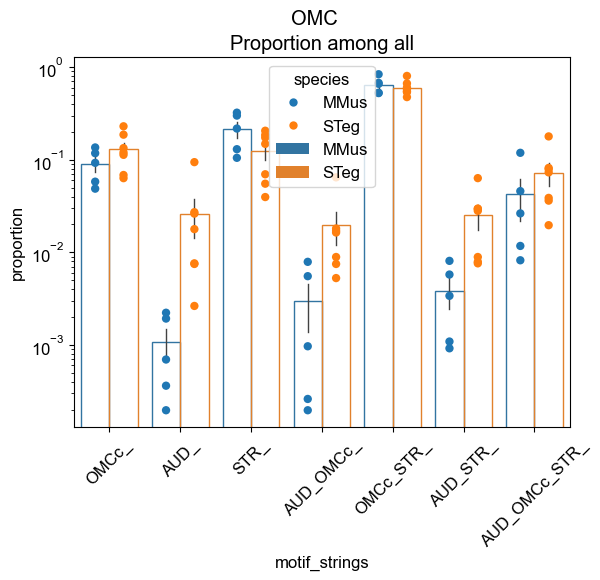

In [88]:
dot_bar_plot(plot_motifs, xaxis="motif_strings", yaxis="proportion", hueaxis="species", dot_size=6)
plt.yscale("log")
plt.xticks(rotation=45, ha="center")
plt.suptitle("OMC")
plt.title("Proportion among all")
plt.show()

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(labels[i], (st_mean[to_plot][i], mm_mean[to_plot][i]))


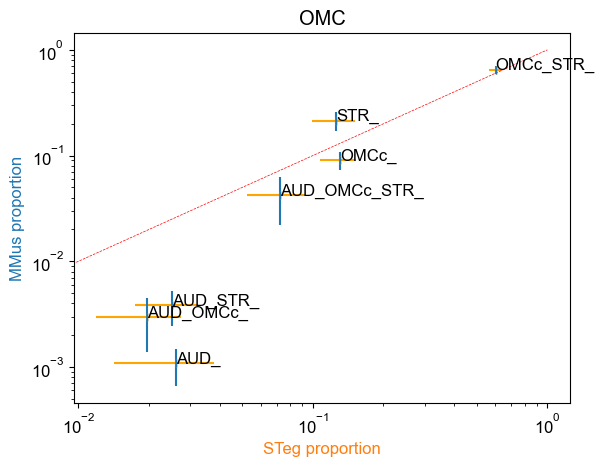

In [89]:
stvmm_area_scatter(plot_motifs, to_plot="proportion", groupby="motif_strings",
                   log=True)
plt.title("OMC")
plt.show()


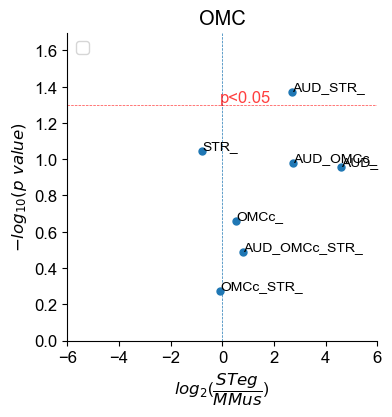

In [90]:
# volano plot
plot_df = proportion_ttest(plot_motifs, groupby="motif_strings")
plot_volcano(plot_df, labels="motif_strings", xlim=(-6,6), p_01=False)
plt.title("OMC")
plt.show()

## ACA

In [91]:
# generate motif strirngs
motifs = []
for i in range(1,4):
    motifs.append(list(combinations(["ACAc", "AUD", "STR"], i)))

motifs = [x for item in motifs for x in item]
memberships = from_memberships(motifs)
motif_tf = memberships.index
motif_tf

motifs_strings = []
for r in motif_tf:
    motif = ""
    for i in range(3):
        if r[i]:
            motif = motif+motif_tf.names[i]+"_"
    motifs_strings.append(motif)

print(motifs)
motifs_strings

[('ACAc',), ('AUD',), ('STR',), ('ACAc', 'AUD'), ('ACAc', 'STR'), ('AUD', 'STR'), ('ACAc', 'AUD', 'STR')]


['ACAc_',
 'AUD_',
 'STR_',
 'ACAc_AUD_',
 'ACAc_STR_',
 'AUD_STR_',
 'ACAc_AUD_STR_']

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:39: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  t_ax = sns.barplot(df, x=xaxis, y=yaxis, hue=hueaxis, errorbar=errorbar, errwidth=1)


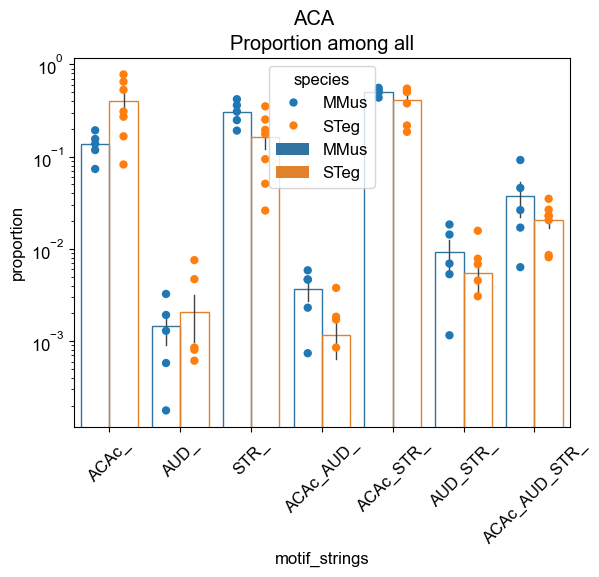

/Users/eisko/github_repos/MAPseq_analysis/MAPseq_plotting.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(labels[i], (st_mean[to_plot][i], mm_mean[to_plot][i]))


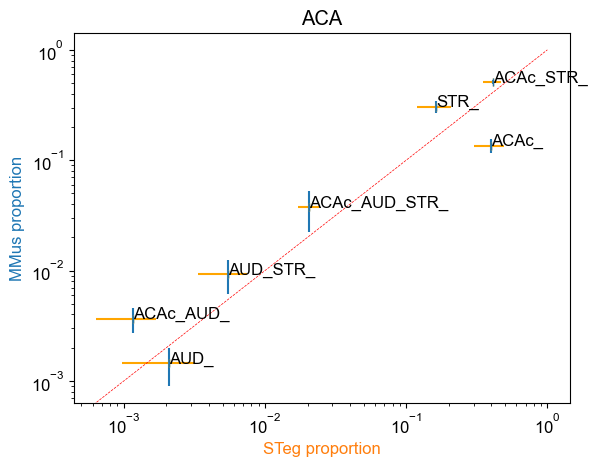

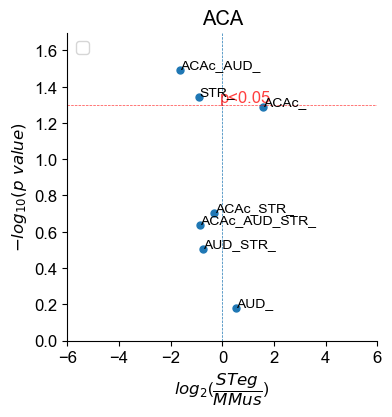

In [92]:
it_areas = ["ACAc", "AUD", "STR"]

it_motif_prop = [df_to_motif_proportion(df, areas=it_areas) for df in aca_it]


motif_dfs = []
for i in range(metadata.shape[0]):
    df = pd.DataFrame({"motif":motifs, "motif_strings":motifs_strings,
                         "proportion":it_motif_prop[i], "species":metadata.loc[i, "species"], 
                        "mice":metadata.loc[i,"mice"]}).reset_index(drop=True)
    motif_dfs.append(df)
plot_motifs = pd.concat(motif_dfs)

dot_bar_plot(plot_motifs, xaxis="motif_strings", yaxis="proportion", hueaxis="species", dot_size=6)
plt.yscale("log")
plt.xticks(rotation=45, ha="center")
plt.suptitle("ACA")
plt.title("Proportion among all")
plt.show()

stvmm_area_scatter(plot_motifs, to_plot="proportion", groupby="motif_strings",
                   log=True)
plt.title("ACA")
plt.show()

# volano plot
plot_df = proportion_ttest(plot_motifs, groupby="motif_strings")
plot_volcano(plot_df, labels="motif_strings", xlim=(-6,6), p_01=False)
plt.title("ACA")
plt.show()